In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import glob
from itertools import cycle

import mesa_reader as ms
from astropy.units import cds

Msol_to_MJup = (cds.Msun.to('kg')/cds.Mjup.to('kg'))

['MESA/RLO_calculations/Mpinit_0.30_MJup_1.00_ME_1_Gyr_old_qs6/binary_history.data', 'MESA/RLO_calculations/Mpinit_0.30_MJup_1.00_ME_1_Gyr_old_qs7/binary_history.data']
['MESA/RLO_calculations/Mpinit_0.30_MJup_3.00_ME_1_Gyr_old_qs6/binary_history.data', 'MESA/RLO_calculations/Mpinit_0.30_MJup_3.00_ME_1_Gyr_old_qs7/binary_history.data']
['MESA/RLO_calculations/Mpinit_0.30_MJup_5.00_ME_1_Gyr_old_qs6/binary_history.data', 'MESA/RLO_calculations/Mpinit_0.30_MJup_5.00_ME_1_Gyr_old_qs7/binary_history.data']
['MESA/RLO_calculations/Mpinit_0.30_MJup_10.00_ME_1_Gyr_old_qs6/binary_history.data', 'MESA/RLO_calculations/Mpinit_0.30_MJup_10.00_ME_1_Gyr_old_qs7/binary_history.data']
['MESA/RLO_calculations/Mpinit_0.30_MJup_30.00_ME_1_Gyr_old_qs6/binary_history.data', 'MESA/RLO_calculations/Mpinit_0.30_MJup_30.00_ME_1_Gyr_old_qs7/binary_history.data']
['MESA/RLO_calculations/Mpinit_0.50_MJup_1.00_ME_1_Gyr_old_qs6/binary_history.data', 'MESA/RLO_calculations/Mpinit_0.50_MJup_1.00_ME_1_Gyr_old_qs7/bina

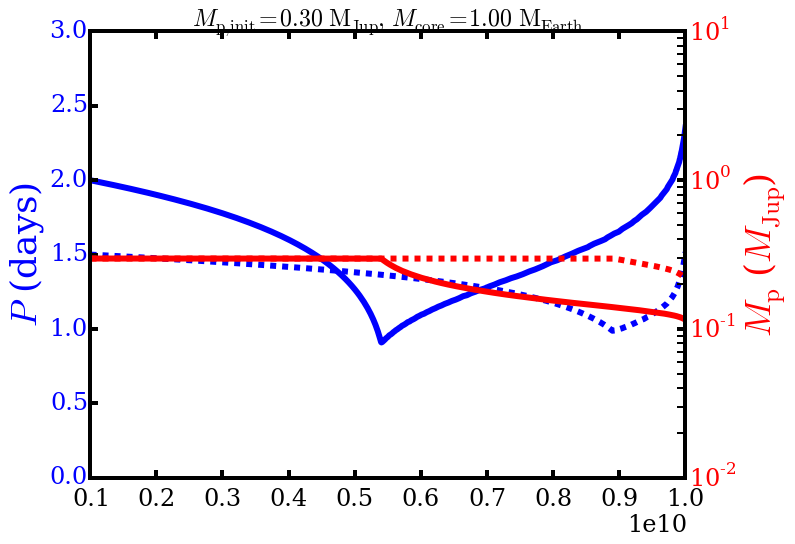

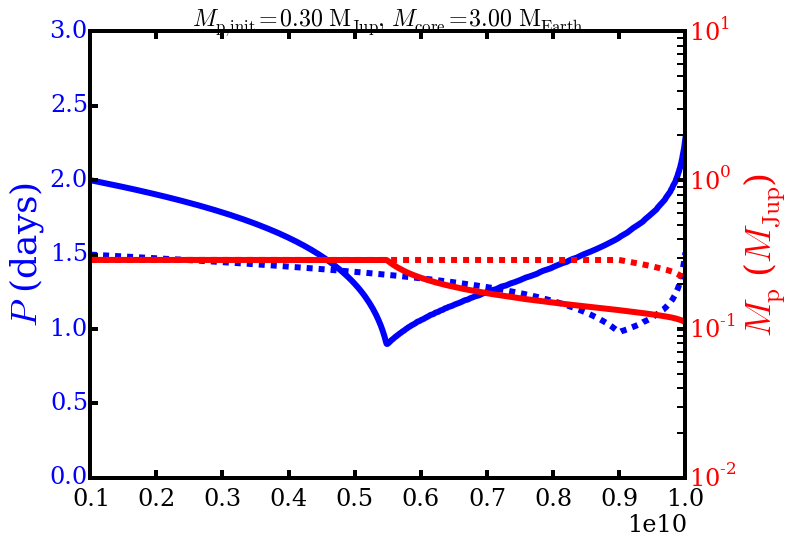

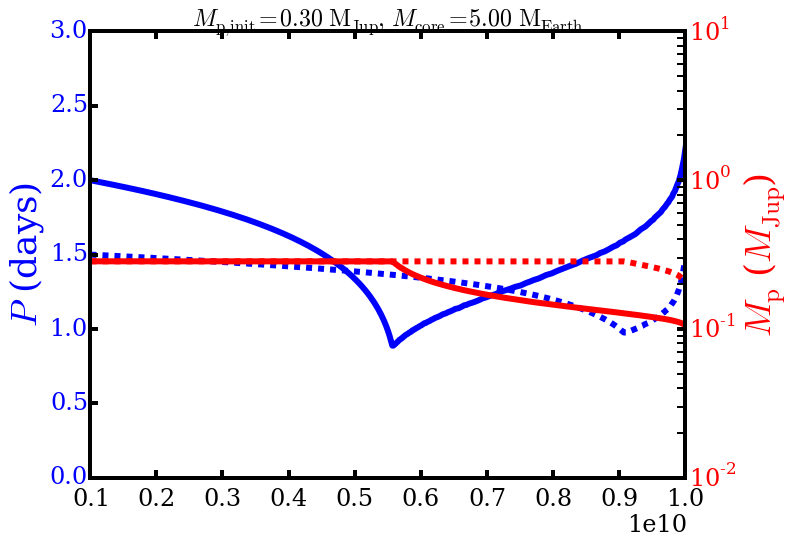

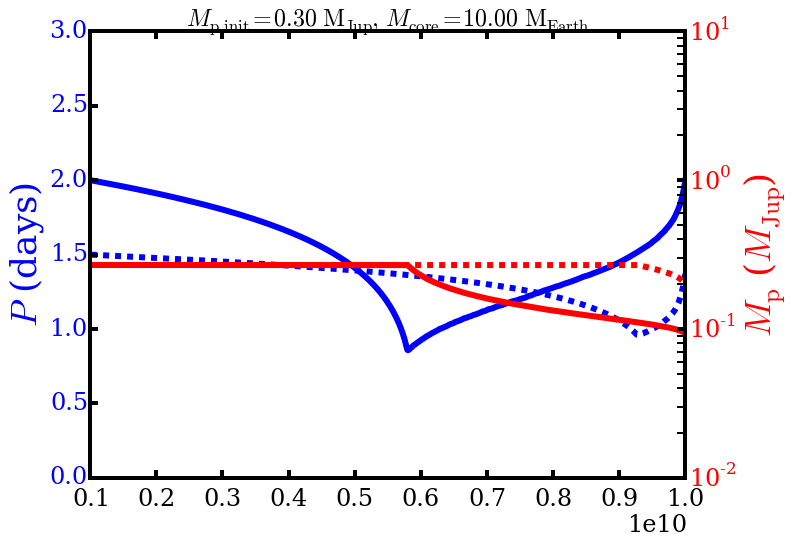

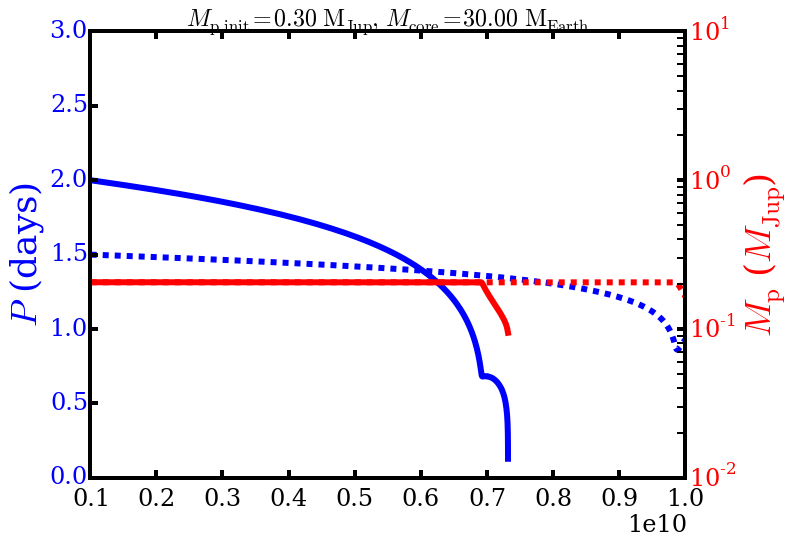

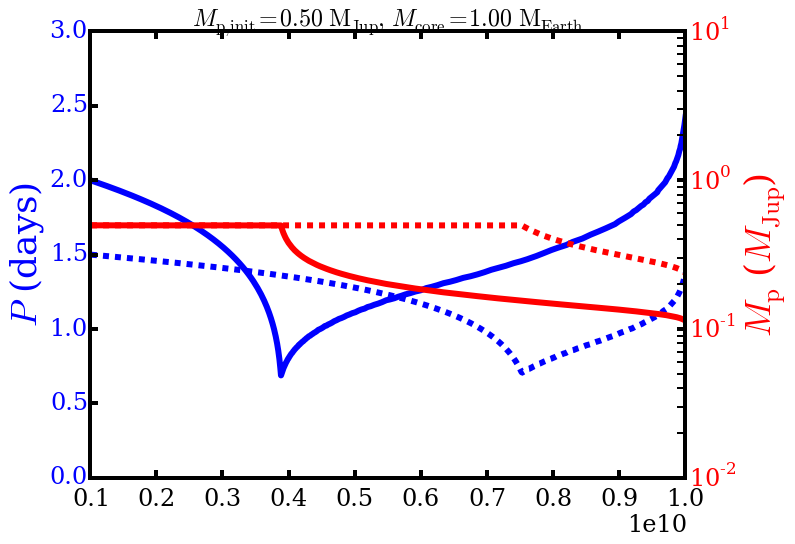

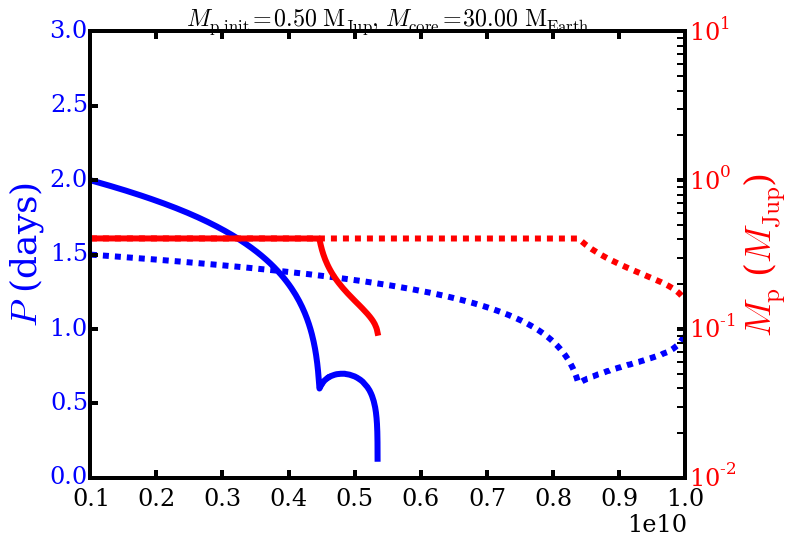

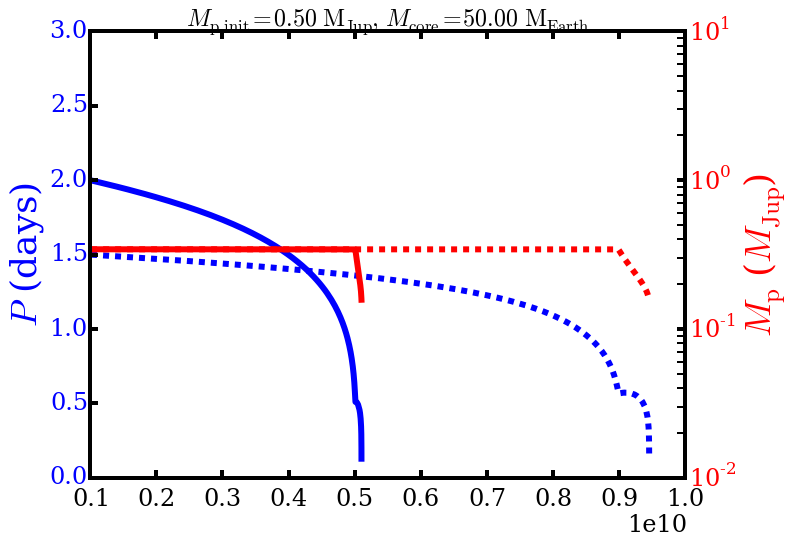

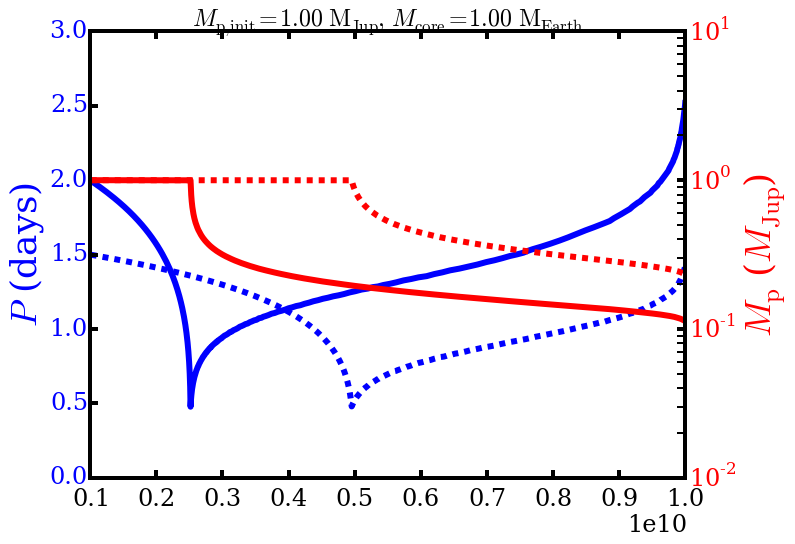

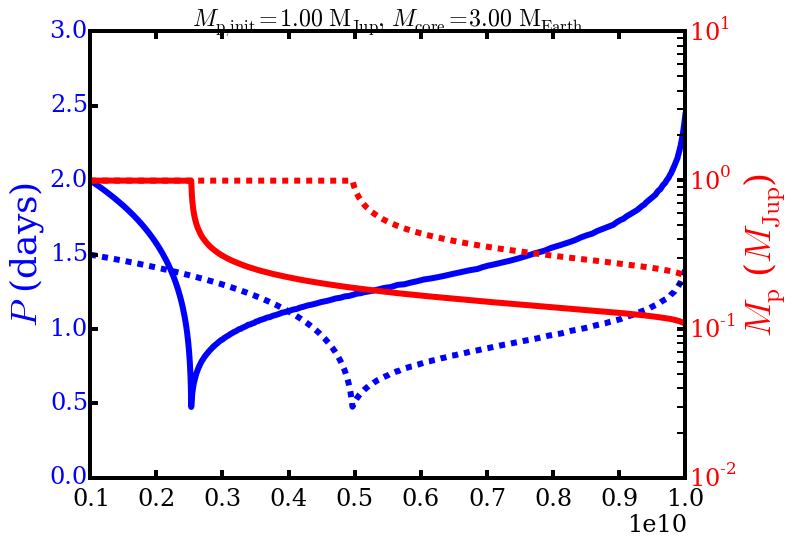

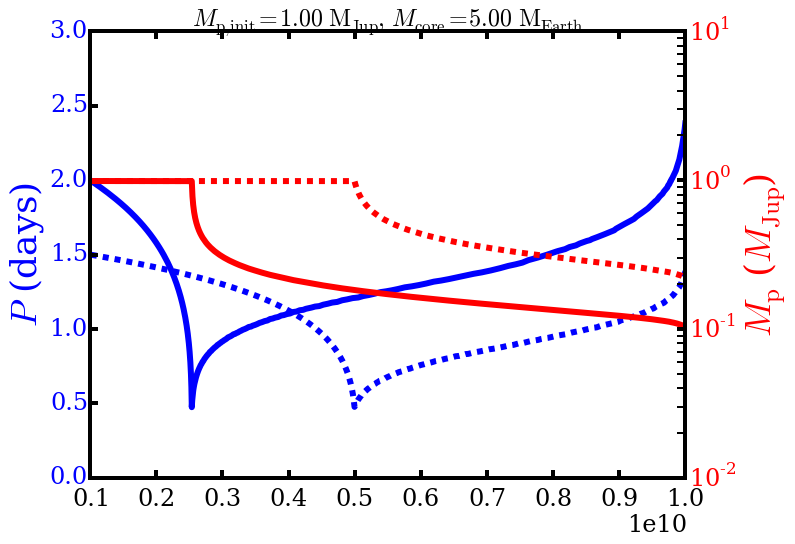

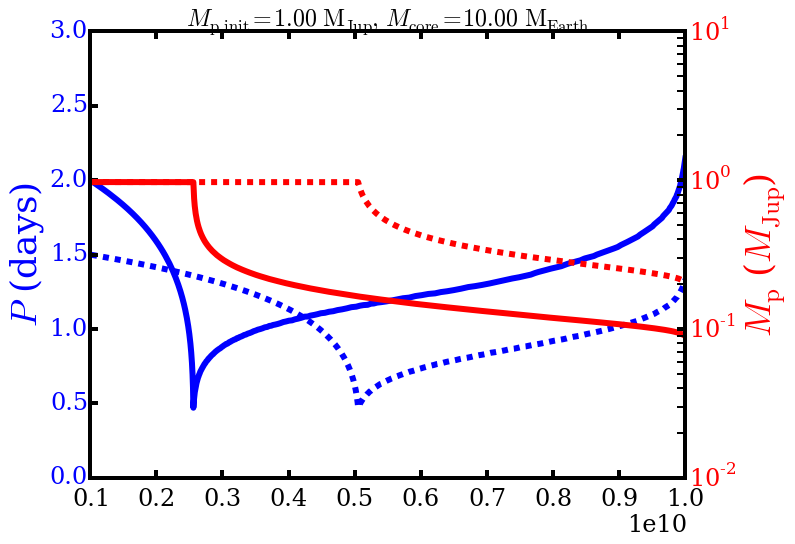

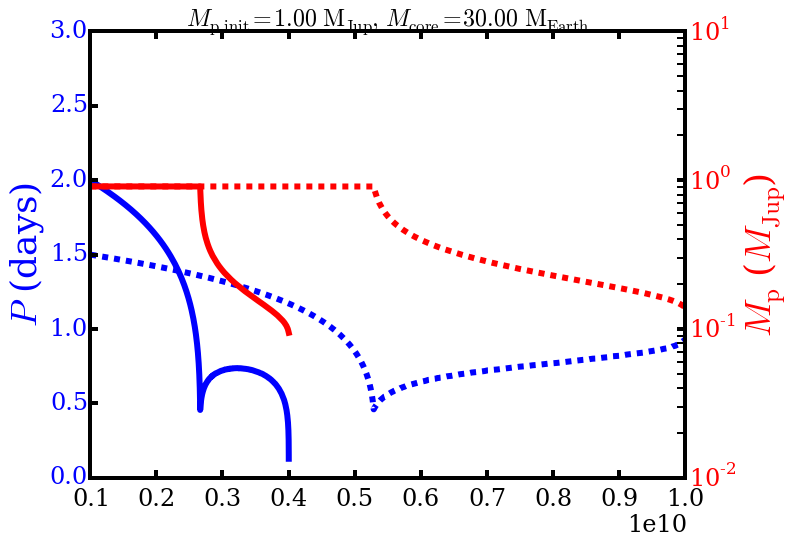

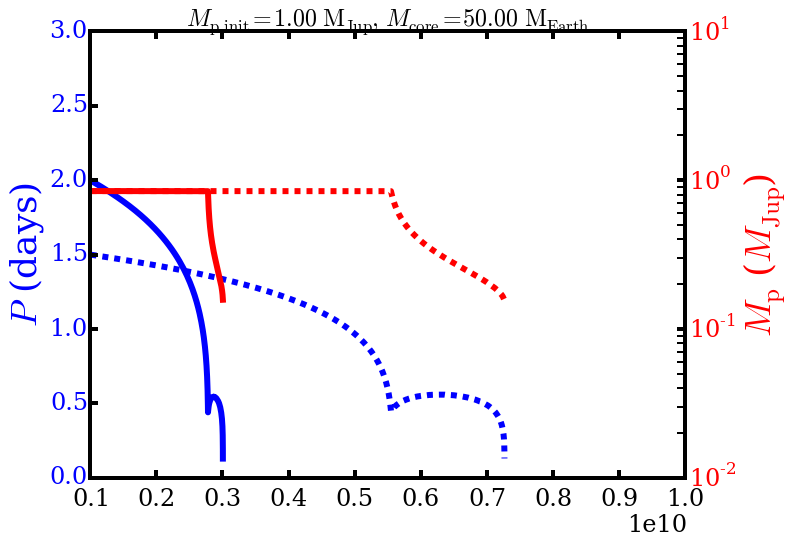

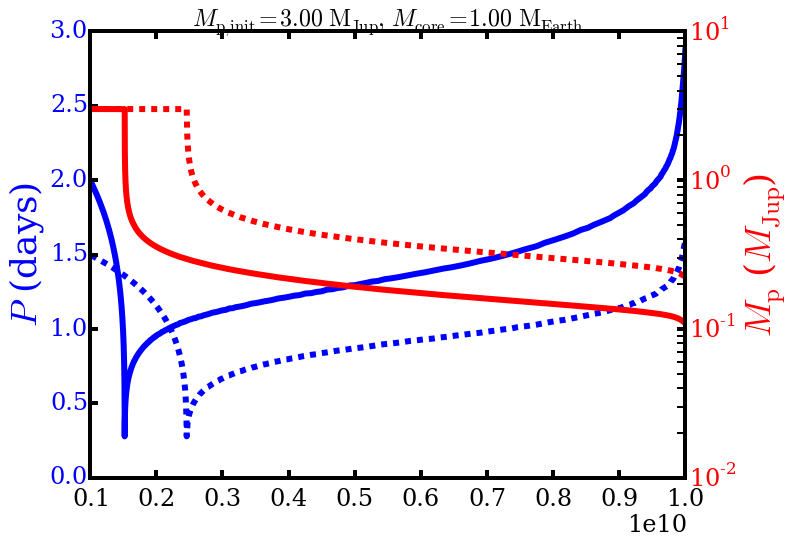

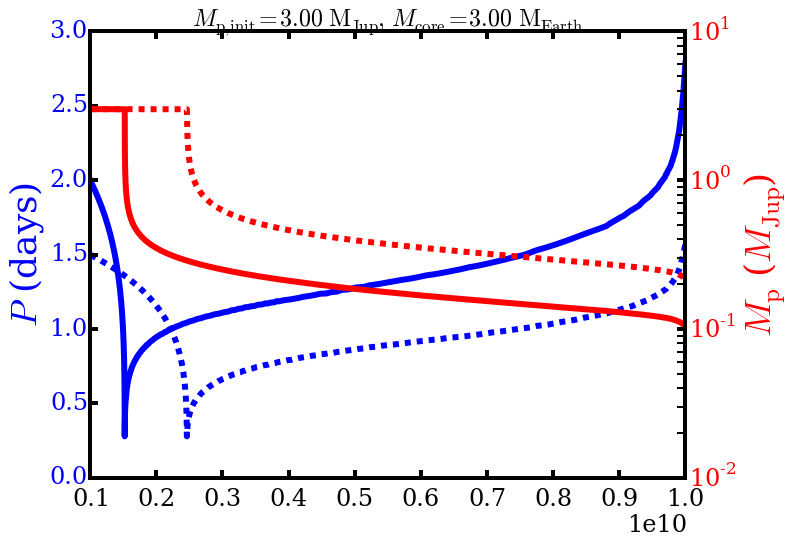

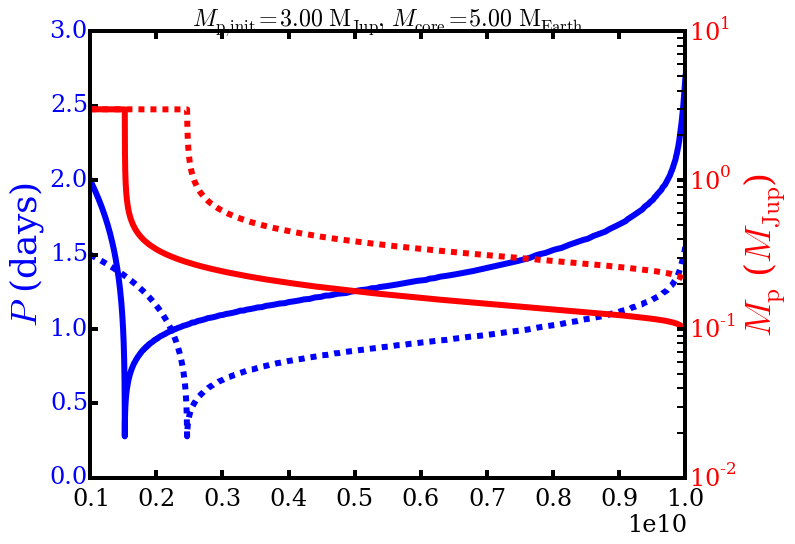

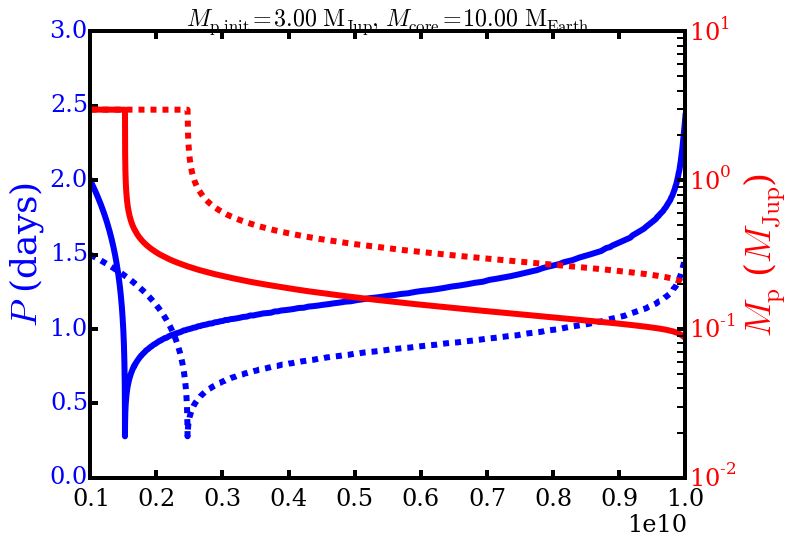

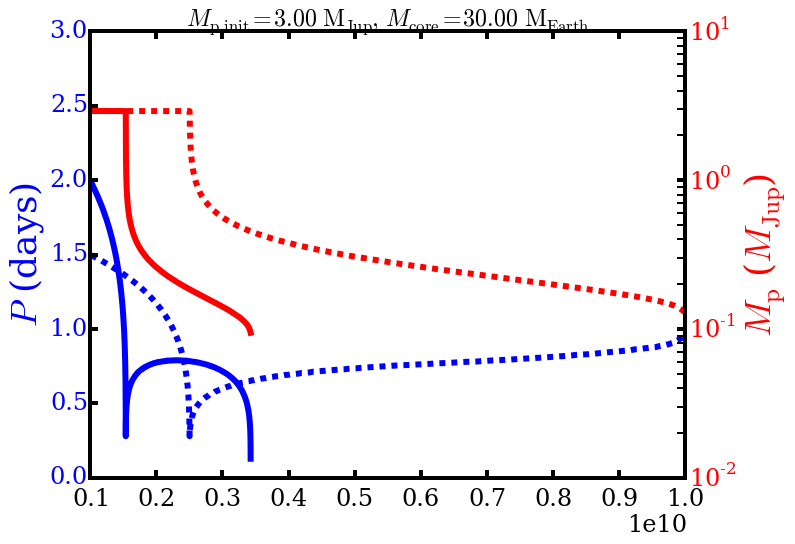

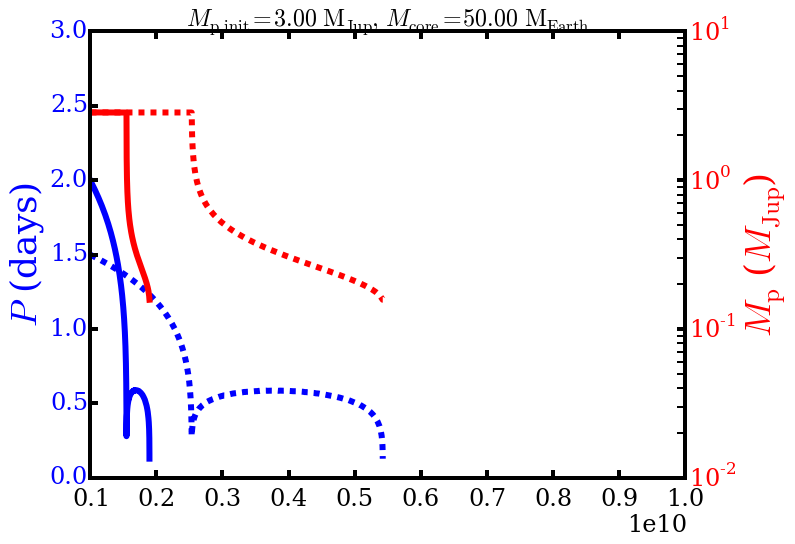

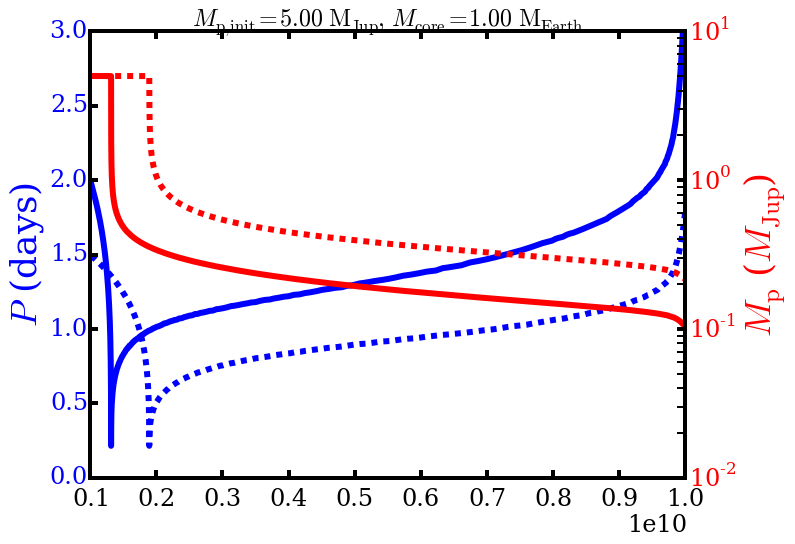

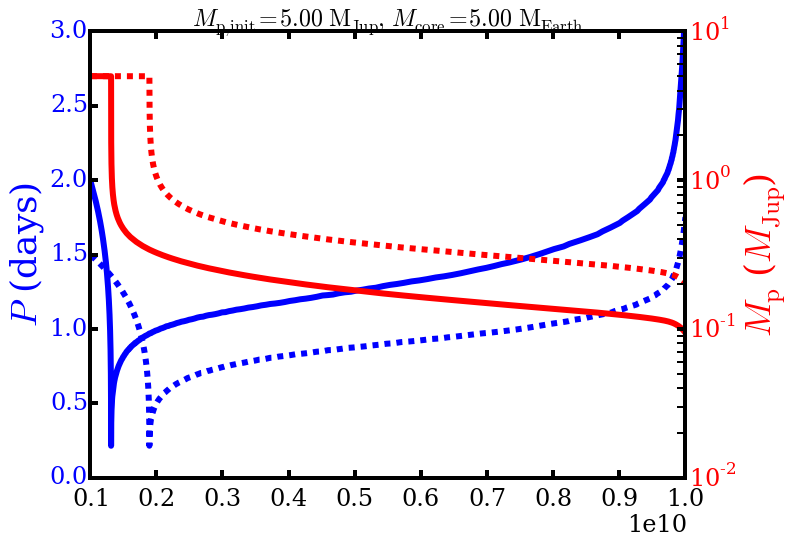

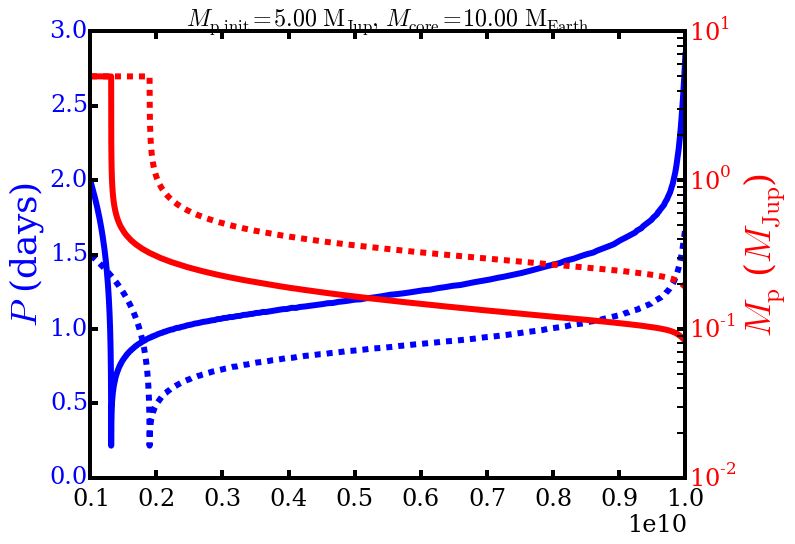

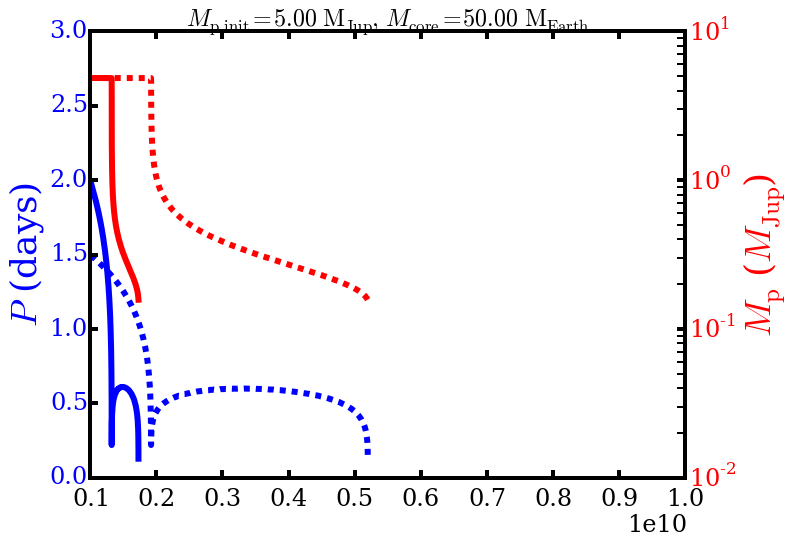

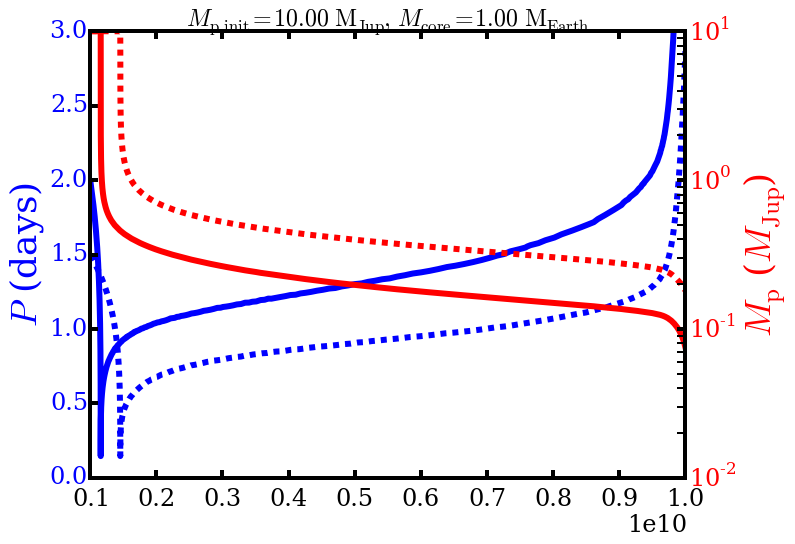

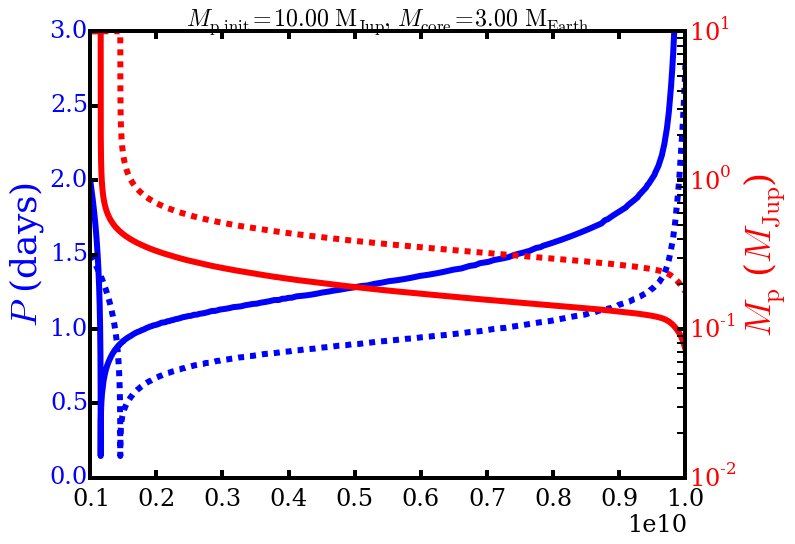

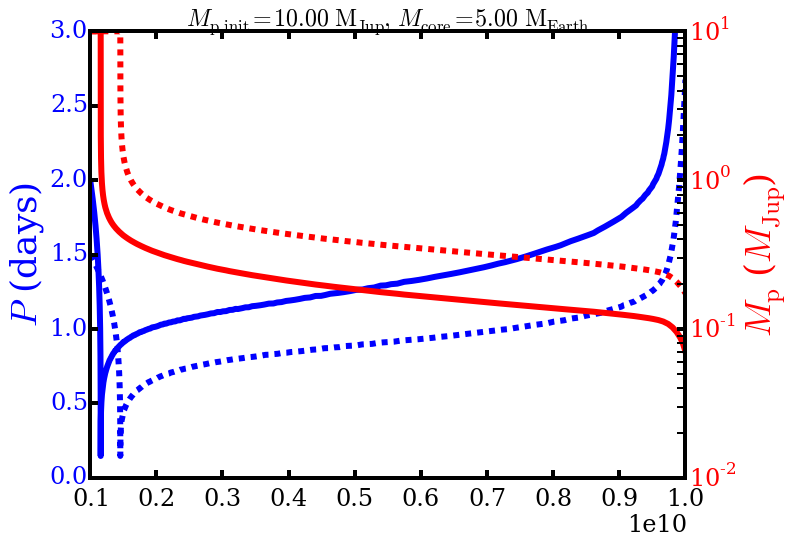

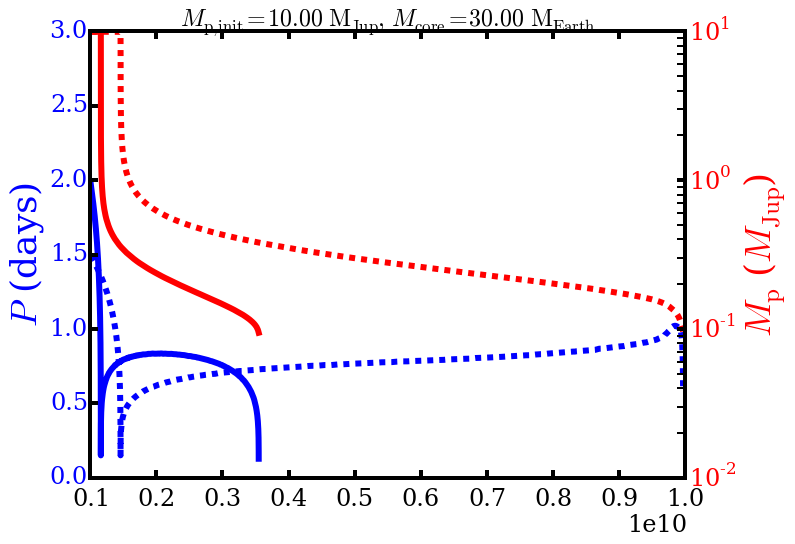

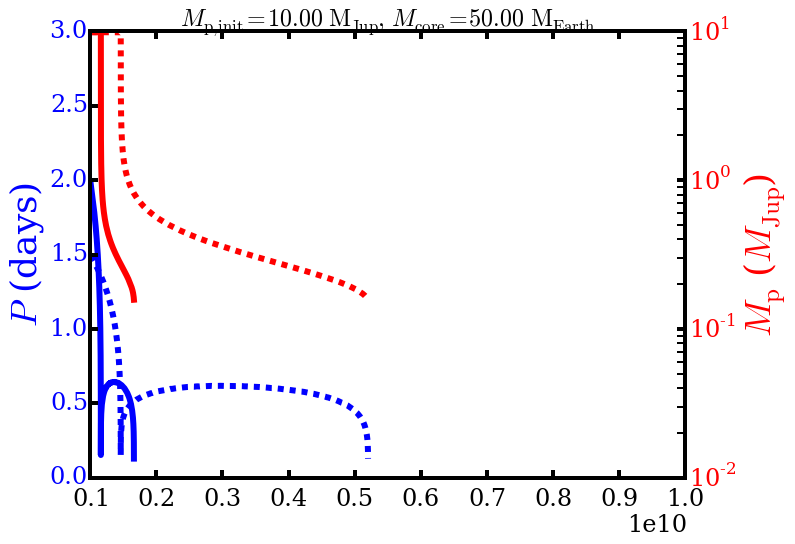

In [57]:
linecycler = cycle(["-","--"])

planet_masses = [0.3, 0.5, 1., 3., 5., 10.]
core_masses = [1., 3., 5., 10., 30., 50.]

for cur_planet_mass in planet_masses:
    for cur_core_mass in core_masses:
        
        files = glob.glob('MESA/RLO_calculations/Mpinit_%.2f*%.2f_ME*/binary_history.data' % 
                          (cur_planet_mass, cur_core_mass))
        if(len(files) == 2):
            
            print(files)
            try:
                qs6 = ms.MesaData(files[0])
                qs7 = ms.MesaData(files[1])
            except:
                continue

            fig = plt.figure(figsize=(8*4./3,8))
            ax1 = fig.add_subplot(111)
            ax2 = ax1.twinx()
            
            ax1.set_ylabel('$P$ (days)', color='b', fontsize=36)
            ax2.set_ylabel('$M_\mathrm{p}$ ($M_\mathrm{Jup}$)', color='r', fontsize=36)

            ls = next(linecycler)
            ax1.plot(qs6.data('age'), qs6.data('period_days'), ls=ls, color='b', lw=6)
            ax2.semilogy(qs6.data('age'), qs6.data('star_1_mass')*Msol_to_MJup, ls=ls, color='r', lw=6)

            ls = next(linecycler)
            ax1.plot(qs7.data('age'), qs7.data('period_days'), ls=ls, color='b', lw=6)
            ax2.semilogy(qs7.data('age'), qs7.data('star_1_mass')*Msol_to_MJup, ls=ls, color='r', lw=6)
            
            ax1.set_ylim([0, 3])
            ax1.set_xlim([1e9, 10e9])
            ax2.set_ylim([0.01, 10])
            
            ax1.grid('off')
            ax2.grid('off')
            
            for tl in ax1.get_yticklabels():
                tl.set_color('b')
            for tl in ax2.get_yticklabels():
                tl.set_color('r')
                
            plt.title("$M_{\\rm p, init} = %.2f\ {\\rm M_{Jup}},\ M_{\\rm core} = %.2f\ {\\rm M_{Earth}}$" % 
                      (cur_planet_mass, cur_core_mass), fontsize=24)
            
            fig.savefig('MESA/RLO_calculations/plots/Mpinit_%.2f_MJup_%.2f_ME_1_Gyr_old.eps'% 
                      (cur_planet_mass, cur_core_mass), dpi=1000, bbox_inches='tight')